In [85]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft, fftfreq,fft2,fftshift,idct
from scipy import fftpack
import scipy.fftpack as fp
from PIL import Image, ImageOps
from skimage import io
from scipy.signal import find_peaks

#set size of fonts in graphs
plt.rcParams.update({'font.size':14}) 

In [86]:
image_path = "C:/Users/javam/Desktop/UCD - Physics/year4/Labs/Lab 4/images-1/IMG_0007.jpg" #path to image
image = Image.open(image_path)

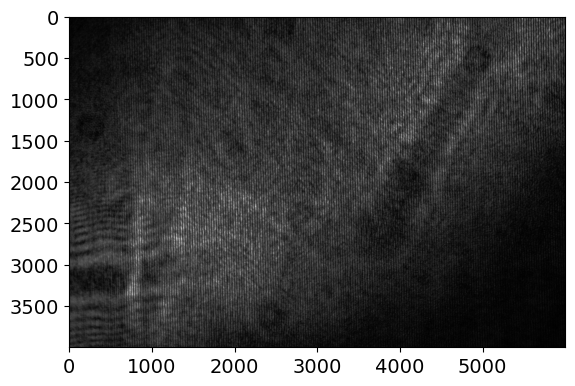

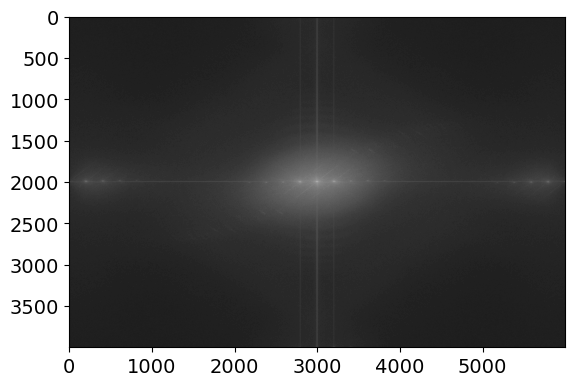

In [87]:
interferogram = io.imread(image_path, as_gray=True)

# Display the interferogram
plt.imshow(interferogram, cmap='gray')
plt.show()
fft_result = np.fft.fft2(interferogram)
fft_shifted = np.fft.fftshift(fft_result)

# Calculate magnitude spectrum
magnitude_spectrum = np.abs(fft_shifted)

# Display the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.show()


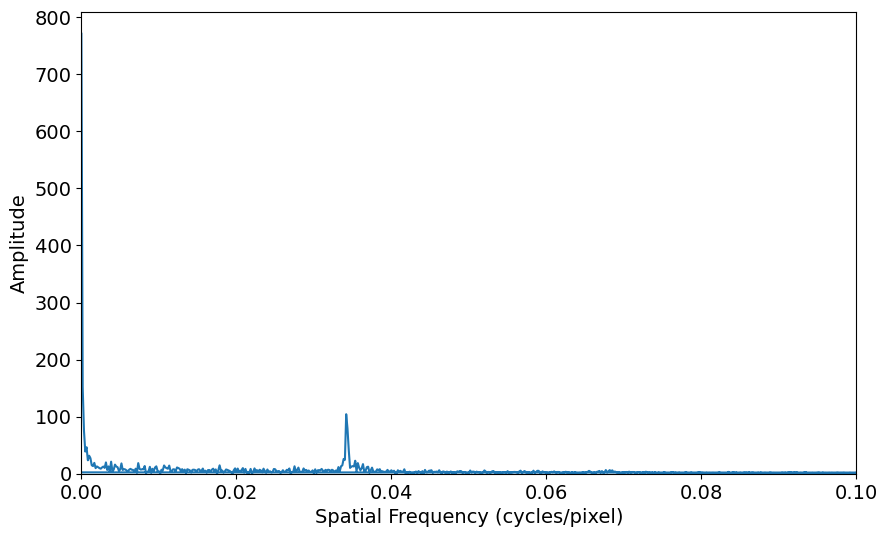

In [88]:
#import image as greyscale
interferogram = io.imread(image_path, as_gray=True)

# Perform 1D Fourier Transform along a line in the image
spectrum = fft(fftshift(interferogram[2000, :]))

# Calculate the spatial frequencies in cycles per pixel
rows, cols = interferogram.shape
frequencies = np.fft.fftfreq(cols, 1)

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(spectrum))
plt.xlabel('Spatial Frequency (cycles/pixel)')
plt.ylabel('Amplitude')
plt.xlim(0,.1)
plt.ylim(0)
plt.show()

15.321375186846035


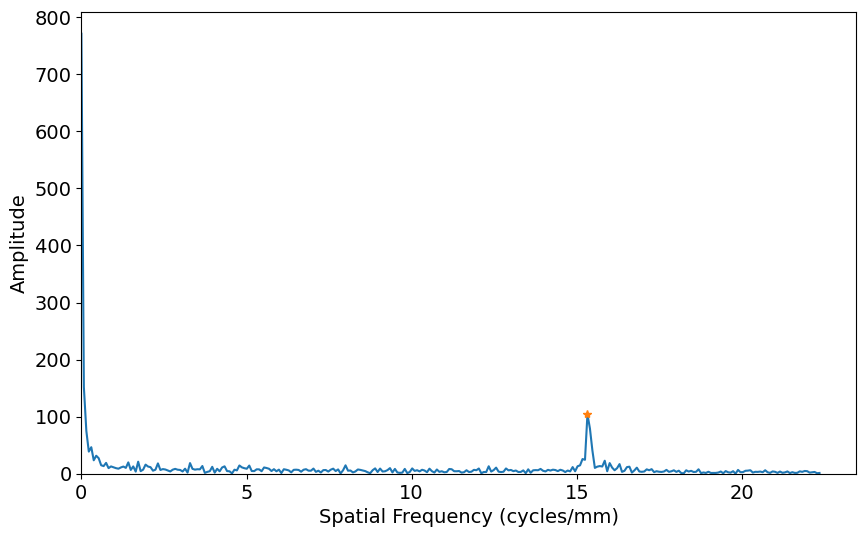

In [91]:
#we will limit the spectrum as we dont care about peaks further up, 300 is sufficient.
lim_index = 300
sliced_spectrum = np.abs(spectrum[0:lim_index])

# Adjust this according to dimensions of camera sensor
conversion_factor = 1 / .00223  

#convert freuquences to cycles per mm
frequencies_mm = frequencies[0:lim_index] * conversion_factor

#detect peaks with a prominence of 40.
peaks, _ = find_peaks(sliced_spectrum, prominence=40) 

#we only want the primary peak
primary_peak = frequencies_mm[peaks][0]
print(primary_peak)

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies_mm, sliced_spectrum)
plt.plot(frequencies_mm[peaks], sliced_spectrum[peaks], "*")
plt.xlabel('Spatial Frequency (cycles/mm)')
plt.ylabel('Amplitude')
plt.xlim(0)
plt.ylim(0)
plt.show()

In [92]:
#set variables based on setup of apparatus.
magnification = 2.42
ne = 1.55093
no = 1.54190

#convert spatial frequency to wavelength
def getWavelength(spatialFreq):
    wl = (2*np.tan(45)*(ne-no)) / spatialFreq*magnification

    return wl

val_mm = (getWavelength(primary_peak)) #in cycle per mm;

#adjust scale to nm
val_nm = val_mm*100000
print(val_nm)

462.051204897943
